<h1>Exploring Titanic Dataset</h1>
<autor>by Javier Villarroel</autor>



In [1]:
#Libraries to import

import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5)

In [2]:
# Import dataset 

titanic_train = pandas.read_csv('train.csv')
titanic_test = pandas.read_csv('test.csv')

VARIABLE DESCRIPTIONS:

<table width="100%">
  <tbody>
      <tr>
      <td>PassengerId <br>
      </td>

      <td> Passenger Identity Number <br>
      </td>
    </tr>
  
    <tr>
      <td>
        <p>Survived</p>
      </td>

      <td>Survival (1 = Yes, 0&nbsp;=&nbsp;No)</td>
    </tr>

    <tr>
      <td>PClass</td>

      <td>
        <p>Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)</p>
      </td>
    </tr>

    <tr>
      <td>Name</td>

      <td>Passanger Name</td>
    </tr>
    
        <tr>
      <td>Sex<br>
      </td>

      <td>Gender<br>
      </td>
    </tr>

    <tr>
      <td>Age</td>

      <td>Age</td>
    </tr>

    <tr>
      <td>Sibsp<br>
      </td>

      <td>Number of Siblings/&nbsp;Spouses Aboard<br>
      </td>
    </tr>

    <tr>
      <td>Parch</td>

      <td>Number of Parents/ Children Aboard</td>
    </tr>

    <tr>
      <td>Ticket<br>
      </td>

      <td>Ticket Number<br>
      </td>
    </tr>

    <tr>
      <td>Fare</td>

      <td>Passenger Fare</td>
    </tr>

    <tr>
      <td>Cabin</td>

      <td>Cabin</td>
    </tr>

    <tr>
      <td>Embarked</td>

      <td>Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)</td>
    </tr>
  </tbody>
</table>

In [3]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
titanic_train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


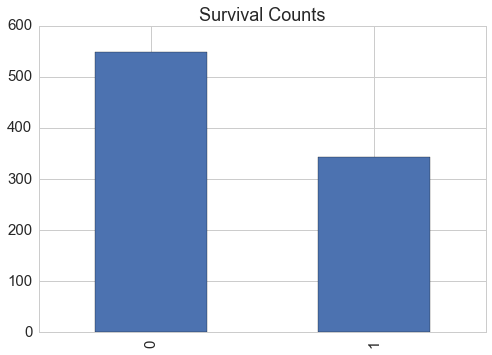

In [5]:
titanic_train['Survived'].value_counts().plot(kind='bar', title='Survival Counts')

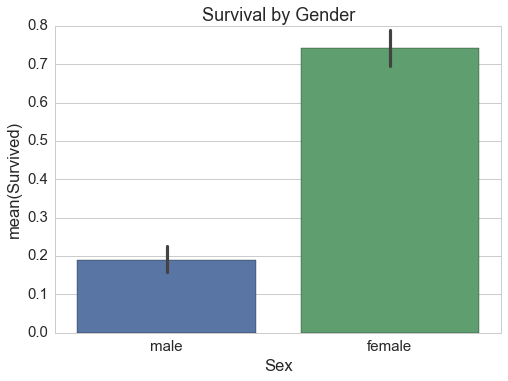

In [6]:
sns.barplot(x="Sex", y="Survived", data=titanic_train)
sns.plt.title('Survival by Gender')

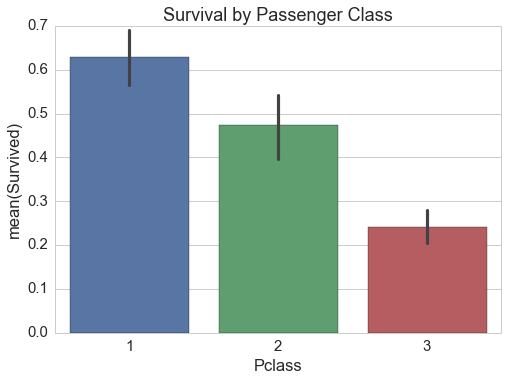

In [7]:
sns.barplot(x="Pclass", y="Survived", data=titanic_train)
sns.plt.title('Survival by Passenger Class')

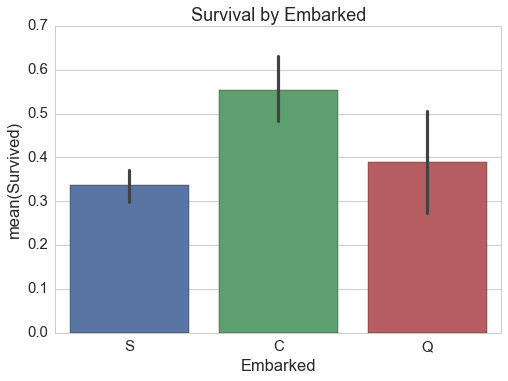

In [8]:
sns.barplot(x="Embarked", y="Survived", data=titanic_train)
sns.plt.title('Survival by Embarked')

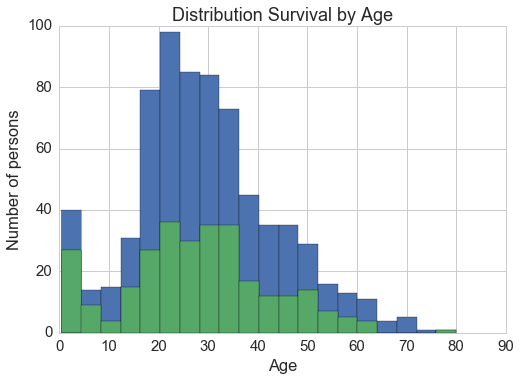

In [9]:
titanic_train["Age"].hist(bins=20)
titanic_train[titanic_train['Survived']==1]["Age"].hist(bins=20)
sns.plt.xlabel('Age')
sns.plt.ylabel('Number of persons')
sns.plt.title('Distribution Survival by Age')

Interesting! there were many kids

Remember, (891-714) 177 row haven't age values

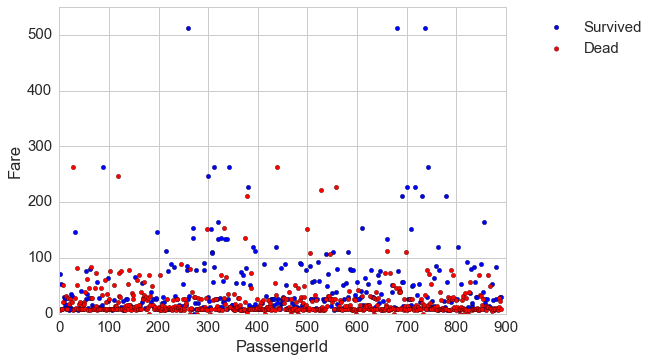

In [10]:

plt.scatter(titanic_train[titanic_train['Survived']==1]['PassengerId'],
            titanic_train[titanic_train['Survived']==1]['Fare'], c = 'b')
plt.scatter(titanic_train[titanic_train['Survived']==0]['PassengerId'],
            titanic_train[titanic_train['Survived']==0]['Fare'], c = 'r')

plt.xlabel('PassengerId')
plt.ylabel('Fare')
plt.xlim([0,900])
plt.ylim([0,550])
plt.legend(('Survived','Dead'),loc='upper left',fontsize=15,bbox_to_anchor=(1.05, 1))

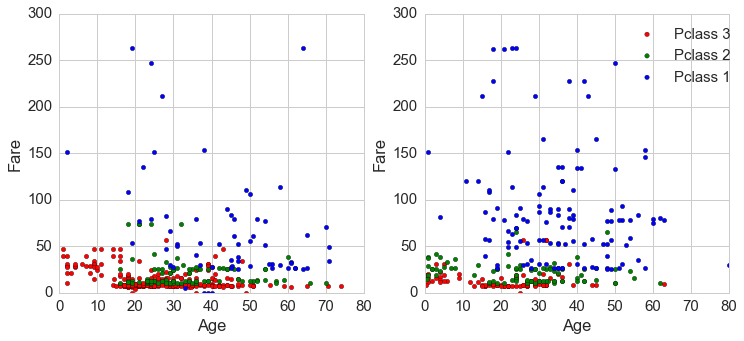

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axes[0].scatter(titanic_train[(titanic_train['Survived']==0)&
                              (titanic_train['Pclass']==3)]['Age'],
                titanic_train[(titanic_train['Survived']==0)&
                              (titanic_train['Pclass']==3)]['Fare'], c = 'r')
axes[0].scatter(titanic_train[(titanic_train['Survived']==0)&
                              (titanic_train['Pclass']==2)]['Age'],
                titanic_train[(titanic_train['Survived']==0)&
                              (titanic_train['Pclass']==2)]['Fare'], c = 'g')
axes[0].scatter(titanic_train[(titanic_train['Survived']==0)&
                              (titanic_train['Pclass']==1)]['Age'],
                titanic_train[(titanic_train['Survived']==0)&
                              (titanic_train['Pclass']==1)]['Fare'], c = 'b')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Fare')
axes[0].set_xlim([0,80])
axes[0].set_ylim([0,300])

axes[1].scatter(titanic_train[(titanic_train['Survived']==1)&
                              (titanic_train['Pclass']==3)]['Age'],
                titanic_train[(titanic_train['Survived']==1)&
                              (titanic_train['Pclass']==3)]['Fare'], c = 'r')
axes[1].scatter(titanic_train[(titanic_train['Survived']==1)&
                              (titanic_train['Pclass']==2)]['Age'],
                titanic_train[(titanic_train['Survived']==1)&
                              (titanic_train['Pclass']==2)]['Fare'], c = 'g')
axes[1].scatter(titanic_train[(titanic_train['Survived']==1)&
                              (titanic_train['Pclass']==1)]['Age'],
                titanic_train[(titanic_train['Survived']==1)&
                              (titanic_train['Pclass']==1)]['Fare'], c = 'b')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Fare')
axes[1].set_xlim([0,80])
axes[1].set_ylim([0,300])
axes[1].legend(('Pclass 3','Pclass 2', 'Pclass 1'),fontsize=15,bbox_to_anchor=(1.05, 1))

<h1>Features Engineering</h1>
<h2>Dummy Features</h2>

In [12]:
#Creation of Dummy features for Sex, Embarker, Pclass

def dummy_features(df):
    new_embarked = pandas.get_dummies(df['Embarked'],prefix='Embarked')
    new_sex = pandas.get_dummies(df['Sex'])
    new_Pclass = pandas.get_dummies(df['Pclass'],prefix='Pclass')
    new_df = pandas.concat([new_embarked,new_sex,new_Pclass],axis=1)
    return new_df

In [13]:
train = pandas.concat([titanic_train,dummy_features(titanic_train)],axis=1)

In [14]:
#I remove outliers in Fare
train = train[train['Fare'] < 450]

<h1>Take a view on Stadistic</h1>

In [15]:
#function to highlight correlations
def correlated(val):
    
    if val != 1.0 and (val > 0.1 or val < -0.1):
        return 'color : {0}'.format("red")
    else:
        return 'color : {0}'.format("black")

corr = train[train['Age']==train['Age']].corr()
corr.style.applymap(correlated).format("{:.2f}")

looks like there is correlations (>|0.1|) between:

-Survived and Fare, Embarked_C, Embarked_S, female, male, Pclass_1, Pclass_3

-Age and Fare, SibSp, Parch, Pclass_1, Pclass_3

It is logic that if you are young, your traveling with familiars, so Age, SibSp and Parch      are correlated

-Fare and Sex, Embarked_C and S, Pclass_1 and 3

It logic thar the price of the ticket are correlated with where people embarked, what class   they buy, how many people trabvel together and the gender 100 year ago. So, this features     could be reduced.

I thinks that PassengerId, SibSp and Parch aren't relevant, Embarked_Q and Pclass_2 neither.  but Age doesn't look relevant but this is not very logic for me.

<h2>PCA Components</h2>

In [16]:
from sklearn.decomposition import PCA

In [17]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'female', 'male', 'Pclass_1', 'Pclass_2',
       'Pclass_3'],
      dtype='object')

In [18]:
col = ['SibSp', 'Age',
       'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'female', 'male', 'Pclass_1', 'Pclass_2',
       'Pclass_3']

pca_df = train[train['Age']==train['Age']][col] 
pca_df_norm = (pca_df - pca_df.mean()) / (pca_df.max() - pca_df.min())
pca = PCA()
pca.fit(pca_df_norm)

pcaResult = pca.explained_variance_

for i in range(len(pcaResult)):
    print("{0}\t{1:.2f}".format(col[i],pcaResult[i]))  


SibSp	0.53
Age	0.36
Parch	0.33
Fare	0.20
Embarked_C	0.05
Embarked_Q	0.05
Embarked_S	0.02
female	0.02
male	0.01
Pclass_1	0.00
Pclass_2	0.00
Pclass_3	0.00


<h1>Predictions</h1>

In [27]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

In [20]:
models = {}

models['LR'] = LogisticRegression()
models['SVC'] = SVC()
models['RF'] = RandomForestClassifier()
models['KN'] = KNeighborsClassifier()
models['GNB'] = GaussianNB()
models['Ada'] = AdaBoostClassifier()
models['XGB'] = XGBClassifier()
models['DT'] = DecisionTreeClassifier()

<h3>First shot</h3>

In [21]:
col = ['SibSp','Parch','Fare',
       'Embarked_C','Embarked_Q', 'Embarked_S', 
       'female', 'male', 
       'Pclass_1', 'Pclass_2','Pclass_3']

limit = int(0.8 * train.shape[0])

X_train = train[col].iloc[:limit,:]
y_train = train['Survived'].iloc[:limit]
X_test = train[col].iloc[limit:,:]
y_test = train['Survived'].iloc[limit:]


In [22]:
for i in models:
    models[i].fit(X_train,y_train)
    score = models[i].score(X_train, y_train)
    predict = models[i].predict(X_test)
    acu = accuracy_score(predict, y_test)
    print("{0}\n score:\t{1:0.4f}\n acc:\t{2:0.4f}".format(i,score,acu))

Ada
 score:	0.8211
 acc:	0.8034
GNB
 score:	0.7831
 acc:	0.8202
DT
 score:	0.9310
 acc:	0.8202
RF
 score:	0.9225
 acc:	0.8146
XGB
 score:	0.8507
 acc:	0.8146
SVC
 score:	0.8197
 acc:	0.8034
LR
 score:	0.8028
 acc:	0.8258
KN
 score:	0.8338
 acc:	0.7697


<h2>Tunnin parameters</h2>

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [37]:
#Supported Vector Machines
X = train[col]
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

parameters = [{'kernel': ['rbf'], 'gamma': [1e-2,1e-3, 1e-4],'C': [1, 10, 100, 1000]}]

clf = GridSearchCV(SVC(C=1), parameters, cv=5,scoring='accuracy')
clf.fit(X_train, y_train)

print("Best parameters: ",clf.best_params_)
print("Best score: ", clf.cv_results_['mean_test_score'].max())

Best parameters:  {'C': 1000, 'kernel': 'rbf', 'gamma': 0.001}
Best score:  0.816901408451


In [43]:
#Random Forest
X = train[col]
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

parameters = { 
    'n_estimators': [5,10, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split':[4,5,8,10]
}

clf = GridSearchCV(models['RF'], parameters, cv=5,scoring='accuracy')
clf.fit(X_train, y_train)

print("Best parameters: ",clf.best_params_)
print("Best score: ", clf.cv_results_['mean_test_score'].max())

Best parameters:  {'max_features': 'auto', 'n_estimators': 10, 'min_samples_split': 8}
Best score:  0.82769726248


In [47]:
#Decision Tree
X = train[col]
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

parameters = { 

    'min_samples_split':[13, 15,18,20,23,25,28]
}

clf = GridSearchCV(models['DT'], parameters, cv=5,scoring='accuracy')
clf.fit(X_train, y_train)

print("Best parameters: ",clf.best_params_)
print("Best score: ", clf.cv_results_['mean_test_score'].max())

Best parameters:  {'min_samples_split': 20}
Best score:  0.818035426731


In [50]:
#Adaboost
X = train[col]
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

parameters = { 

    'n_estimators': [23, 25, 27], 
    'learning_rate': [0.8, 1.0, 1.2]
}

clf = GridSearchCV(models['Ada'], parameters, cv=5,scoring='accuracy')
clf.fit(X_train, y_train)

print("Best parameters: ",clf.best_params_)
print("Best score: ", clf.cv_results_['mean_test_score'].max())

Best parameters:  {'learning_rate': 1.0, 'n_estimators': 25}
Best score:  0.798711755233


In [57]:
#Xgboost
X = train[col]
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



parameters = {
        'max_depth': [ 9, 12,20, 25],
        'subsample': [0.5,0.9, 1.0]
}

clf = GridSearchCV(models['XGB'], parameters, cv=5,scoring='accuracy')
clf.fit(X_train, y_train)

print("Best parameters: ",clf.best_params_)
print("Best score: ", clf.cv_results_['mean_test_score'].max())

Best parameters:  {'subsample': 1.0, 'max_depth': 20}
Best score:  0.830917874396


In [59]:
params = {
#    'LR' : {},
    'SVC' : {'C': 1000, 'kernel': 'rbf', 'gamma': 0.001},
    'RF' : {'max_features': 'auto', 'n_estimators': 10, 'min_samples_split': 8},
#    'KN' : {},
#    'GNB' : {},
    'Ada' : {'learning_rate': 1.0, 'n_estimators': 25},
    'XGB' : {'subsample': 1.0, 'max_depth': 20},
    'DT' : {'min_samples_split': 20}
}

col = ['SibSp','Parch','Fare',
       'Embarked_C','Embarked_Q', 'Embarked_S', 
       'female', 'male', 
       'Pclass_1', 'Pclass_2','Pclass_3']

limit = int(0.8 * train.shape[0])

X_train = train[col].iloc[:limit,:]
y_train = train['Survived'].iloc[:limit]
X_test = train[col].iloc[limit:,:]
y_test = train['Survived'].iloc[limit:]



for i in models:
    if i in params:
        models[i].fit(X_train,y_train)
        score = models[i].score(X_train, y_train)
        predict = models[i].predict(X_test)
        acu = accuracy_score(predict, y_test)
        print("{0}\n score:\t{1:0.4f}\n acc:\t{2:0.4f}".format(i,score,acu))

Ada
 score:	0.8211
 acc:	0.8034
DT
 score:	0.9310
 acc:	0.8258
RF
 score:	0.9225
 acc:	0.8315
XGB
 score:	0.8507
 acc:	0.8146
SVC
 score:	0.8197
 acc:	0.8034
